In [2]:
#Built model before feature engineering


import sklearn.preprocessing as preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder # For change categorical variable into int
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from sklearn import svm
convert_data_no_dummy = LabelEncoder()
scaler = preprocessing.StandardScaler() 


In [5]:
data_no_dummy = pd.read_csv(r'C:/Users/Ruchita Garde/Documents/Academic/Sem 2/CS 584/FinalProject/HR_comma_sep.csv') #read data_no_dummy from csv
data_no_dummy.head()


,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,satisfaction_level,promotion_last_5years,sales,salary
0,1,0.53,2,157,3,0,0.38,0,sales,low
1,1,0.86,5,262,6,0,0.80,0,sales,medium
2,1,0.88,7,272,4,0,0.11,0,sales,medium
3,1,0.87,5,223,5,0,0.72,0,sales,low
4,1,0.52,2,159,3,0,0.37,0,sales,low


In [9]:
#convert the categorical predictors to numerical predictors
data_no_dummy['salary']=convert_data_no_dummy.fit_transform(pd.DataFrame(data_no_dummy['salary']))
data_no_dummy['sales']=convert_data_no_dummy.fit_transform(pd.DataFrame(data_no_dummy['sales']))
age_scale_param = scaler.fit(pd.DataFrame(data_no_dummy['average_montly_hours']))
data_no_dummy['average_montly_hours'] = scaler.fit_transform(pd.DataFrame(data_no_dummy['average_montly_hours']), age_scale_param)


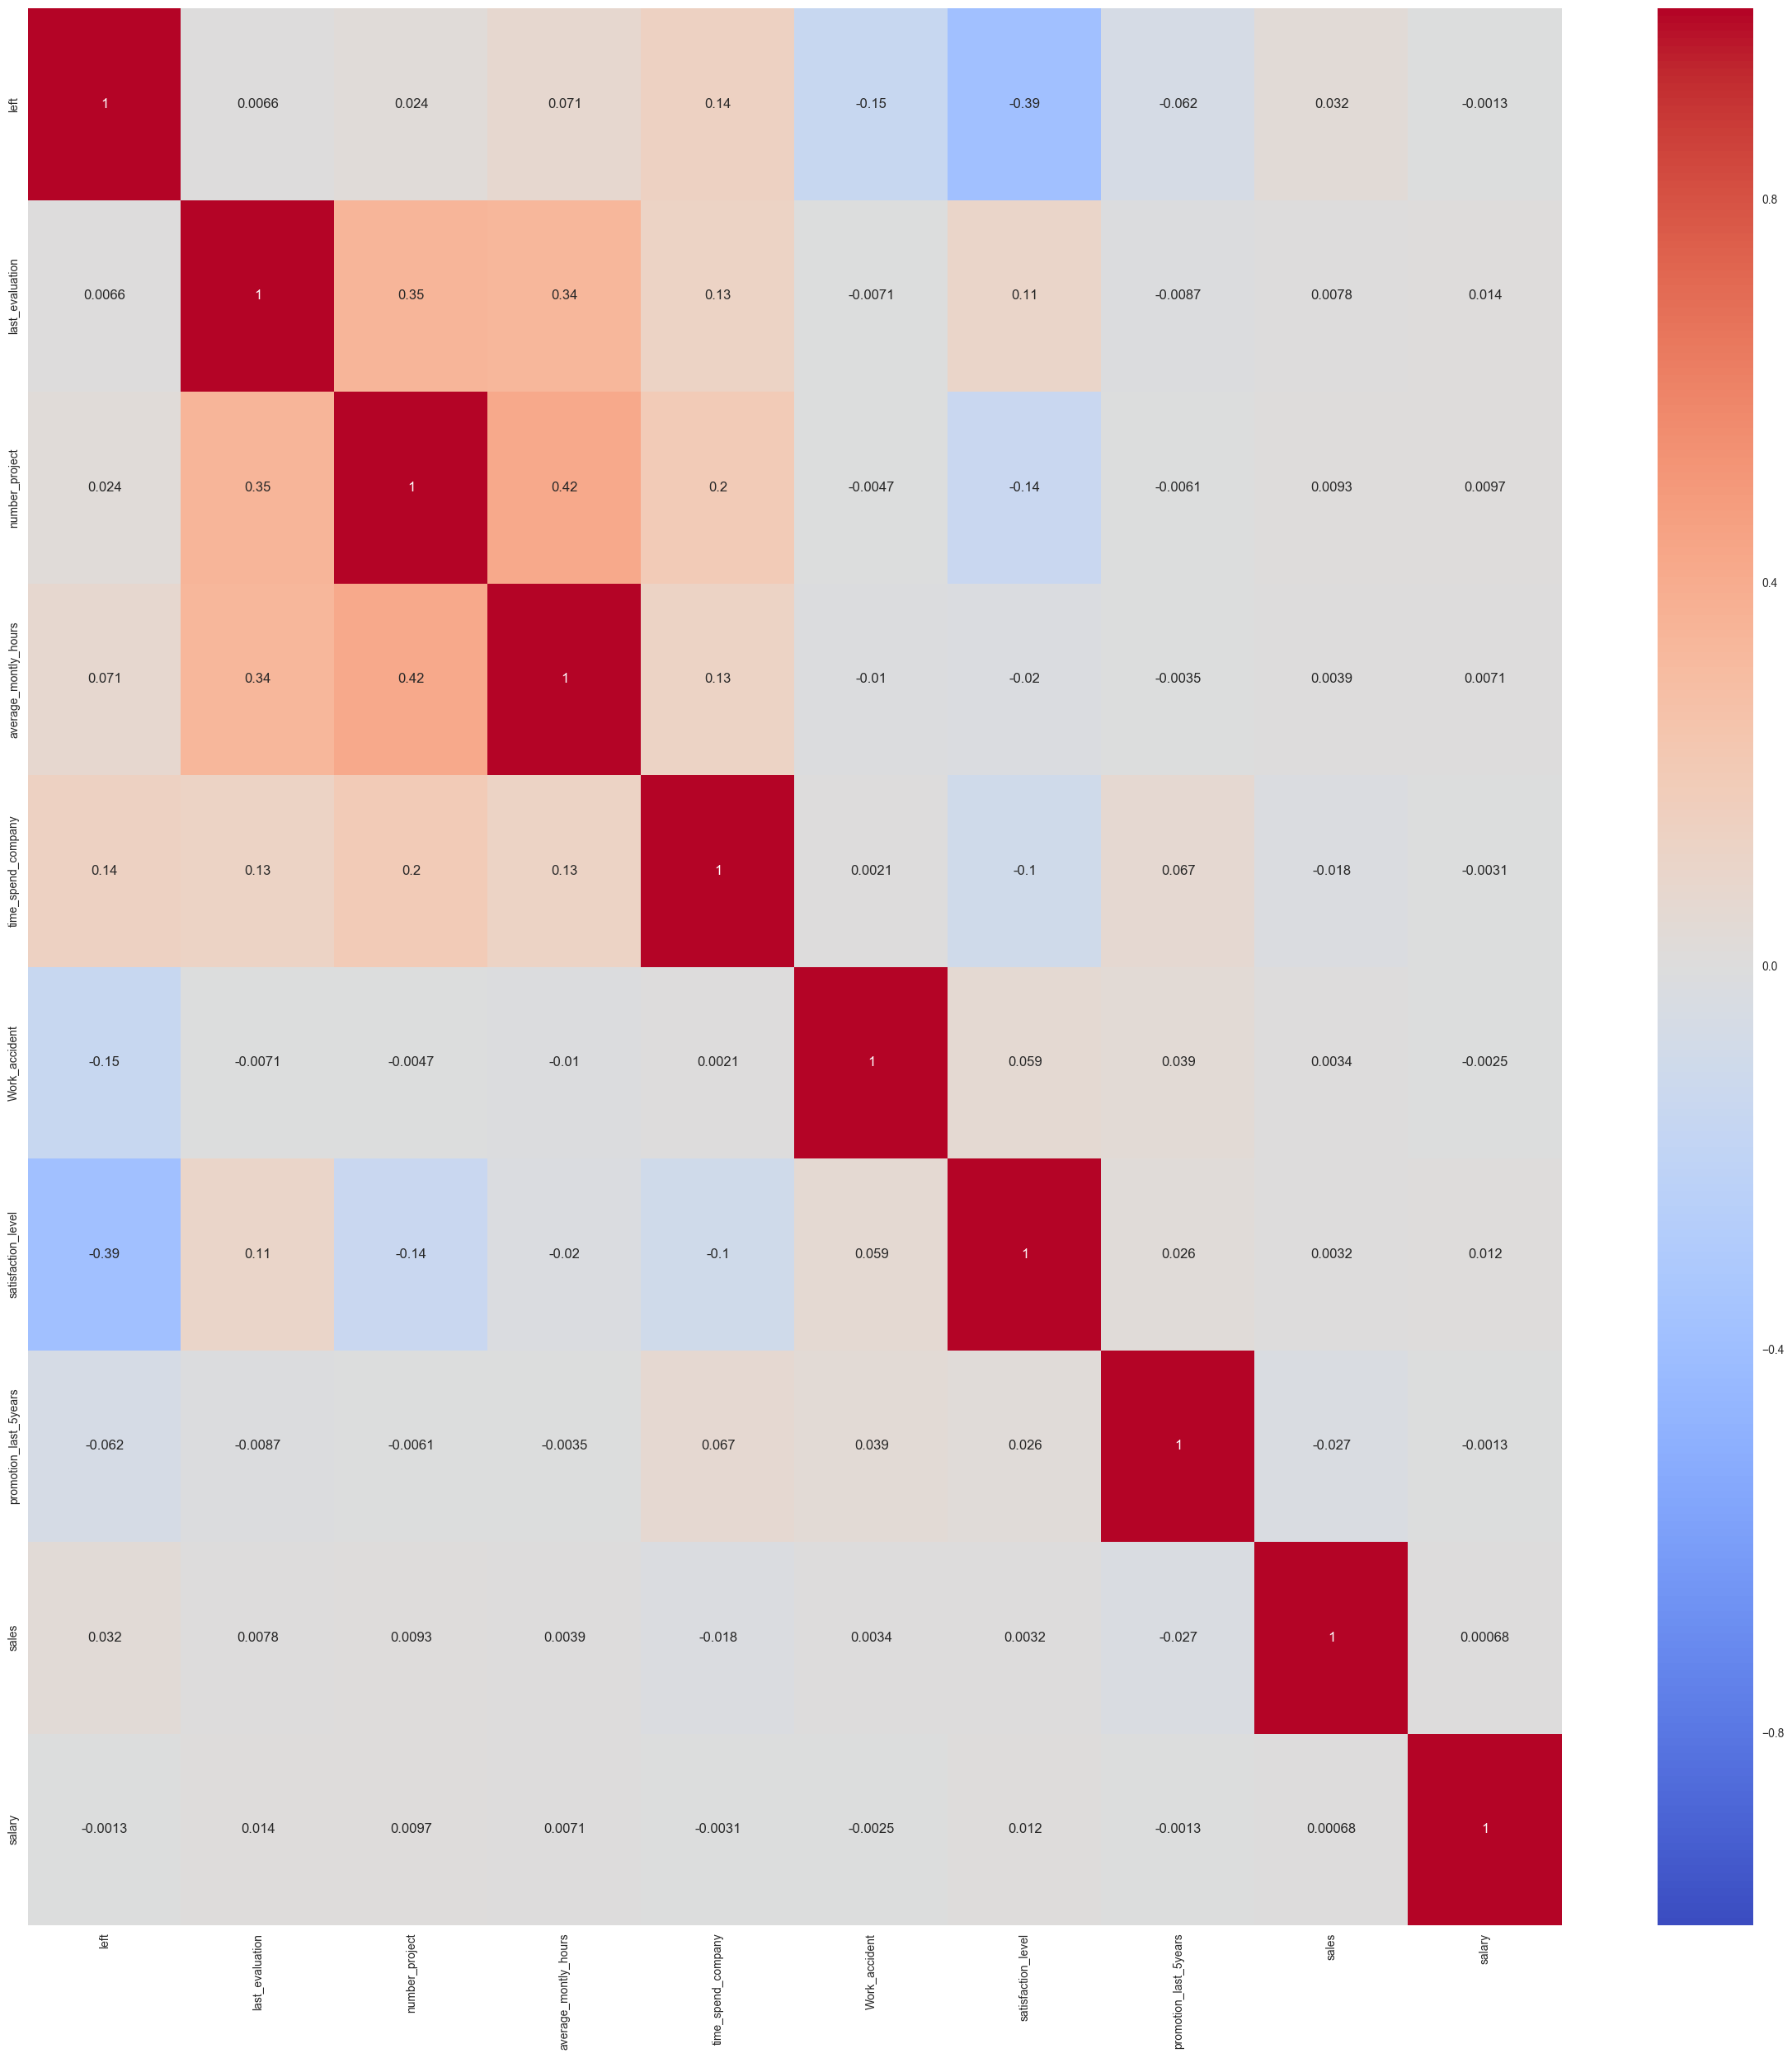

In [12]:
#calculate the correlation of the variables, some variables have strong correlation that cannot used to build the model
variables_corr = data_no_dummy.corr()

plt.figure(figsize=(30,30))
sns.heatmap(variables_corr,annot=True,cbar=True,cmap="coolwarm")
plt.xticks(rotation=90)

plt.show()

In [13]:
name_of_variables = list(data_no_dummy)
#remove the name of 'left'
name_of_variables.remove('left')
data_no_dummy = data_no_dummy.as_matrix()
#separate the target variable and predicators
y = data_no_dummy[:, 0]
x = data_no_dummy[:, 1:]
    
X_train_no_dummy, X_test_no_dummy, y_train_no_dummy, y_test_no_dummy = train_test_split(x, y, test_size=.2,
                                                    random_state=0)
X_train_no_dummy, X_validation_no_dummy, y_train_no_dummy, y_validation_no_dummy = train_test_split(X_train_no_dummy, y_train_no_dummy, test_size=.3,
                                                    random_state=0)

In [14]:
#building the logistic regession model, using training data_no_dummy to train the model
lin_regression = linear_model.LogisticRegression()      
lin_regression.fit(X_train_no_dummy, y_train_no_dummy)
#check the model's accuracy using cross validation in case overfitting
scores_linear_no_dummy_no_cut = cross_val_score(lin_regression, X_train_no_dummy, y_train_no_dummy, cv=10)
scores_linear_no_dummy_no_cut.mean()      
#use the model to predict the samples
yhat_linear = lin_regression.predict(X_validation_no_dummy)
yhat_linear_test = lin_regression.predict(X_test_no_dummy)

In [15]:
#train the random forest classifier
random_classify = RandomForestClassifier(n_estimators = 100)
random_classify = random_classify.fit(X_train_no_dummy, y_train_no_dummy)
scores_RF_no_dummy_no_cut = cross_val_score(random_classify, X_train_no_dummy, y_train_no_dummy, cv=10)
yhat_randomForest = random_classify.predict(X_validation_no_dummy)
yhat_randomForest_test = random_classify.predict(X_test_no_dummy)

#run svm algorithm
svm_classifier = svm.SVC().fit(X_train_no_dummy, y_train_no_dummy)
scores_svm_no_dummy_no_cut = cross_val_score(svm_classifier, X_train_no_dummy, y_train_no_dummy, cv=10)
yhat_svm = svm_classifier.predict(X_validation_no_dummy)
yhat_svm_test = svm_classifier.predict(X_test_no_dummy)

#run knn algorithm
knn_classifier = knn(n_neighbors=3).fit(X_train_no_dummy, y_train_no_dummy)
scores_knn_no_dummy_no_cut = cross_val_score(knn_classifier, X_train_no_dummy, y_train_no_dummy, cv=10)
yhat_knn_no_dummy = svm_classifier.predict(X_validation_no_dummy)
yhat_knn_no_dummy_test = svm_classifier.predict(X_test_no_dummy)                  
importance_features_values = random_classify.feature_importances_
importance_values = zip(name_of_variables, importance_features_values)

In [26]:
#sort the importance values by descending order
importance_values = sorted(importance_values, key=lambda values: values[1])
importance_values.reverse()
importance_features_values = list(importance_features_values)
#put the algo name and acc nodummy result
name_of_algo = ['Logistic regression', 'KNN', 'SVM', 'Random Forest']
#The cross validation result of the model
acc_of_algo = [scores_linear_no_dummy_no_cut.mean(), scores_knn_no_dummy_no_cut.mean(),
               scores_svm_no_dummy_no_cut.mean(), scores_RF_no_dummy_no_cut.mean()]
validation_set_acc = []
test_set_acc = []

In [27]:
#create the validation set accuracy of model
validation_set_acc.append(accuracy_score(yhat_linear, y_validation_no_dummy))
validation_set_acc.append(accuracy_score(yhat_knn_no_dummy, y_validation_no_dummy))
validation_set_acc.append(accuracy_score(yhat_svm, y_validation_no_dummy))
validation_set_acc.append(accuracy_score(yhat_randomForest, y_validation_no_dummy))

test_set_acc.append(accuracy_score(yhat_linear_test, y_test_no_dummy))
test_set_acc.append(accuracy_score(yhat_knn_no_dummy_test, y_test_no_dummy))
test_set_acc.append(accuracy_score(yhat_svm_test, y_test_no_dummy))
test_set_acc.append(accuracy_score(yhat_randomForest_test, y_test_no_dummy))                   
Accuracy_no_dummy = pd.DataFrame(
    { "cross validation accuracy of the model": acc_of_algo, "Classification Algorithms" :name_of_algo, "validation set accuracy of model" :validation_set_acc, "testset accuracy of model": test_set_acc})

Accuracy_no_dummy.head()

,Classification Algorithms,cross validation accuracy of the model,testset accuracy of model,validation set accuracy of model
0,Logistic regression,0.764735,0.764333,0.770833
1,KNN,0.944638,0.955333,0.946944
2,SVM,0.952972,0.955333,0.946944
3,Random Forest,0.989284,0.989333,0.987222


In [28]:
Accuracy_no_dummy.describe()

,cross validation accuracy of the model,testset accuracy of model,validation set accuracy of model
count,4.000000,4.000000,4.000000
mean,0.912907,0.916083,0.912986
std,0.100665,0.102428,0.096652
min,0.764735,0.764333,0.770833
25%,0.899662,0.907583,0.902917
50%,0.948805,0.955333,0.946944
75%,0.962050,0.963833,0.957014
max,0.989284,0.989333,0.987222


In [29]:
#calculate fpr and tpr 
y_score_linear_nodummy = linear_model.LogisticRegression().fit(X_train_no_dummy, y_train_no_dummy).decision_function(X_test_no_dummy)
y_score_knn_nodummy =  knn().fit(X_train_no_dummy, y_train_no_dummy).predict_proba(X_test_no_dummy)
y_score_knn_nodummy = y_score_knn_nodummy[:, 1]
y_score_svm_nodummy = svm.SVC().fit(X_train_no_dummy, y_train_no_dummy).decision_function(X_test_no_dummy)
y_score_RF_nodummy = RandomForestClassifier().fit(X_train_no_dummy, y_train_no_dummy).predict_proba(X_test_no_dummy)
y_score_RF_nodummy = y_score_RF_nodummy[:, 1]
y_score = [ y_score_linear_nodummy, y_score_knn_nodummy, y_score_svm_nodummy, y_score_RF_nodummy]
classifier_name = ['LogisticRegression', 'KNN', 'SVM', 'Random Forest']


In [30]:
fpr = dict()
tpr = dict()
roc_auc = dict()
auc_val = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_no_dummy, y_score[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    auc_val[i] = metrics.auc(fpr[i], tpr[i])

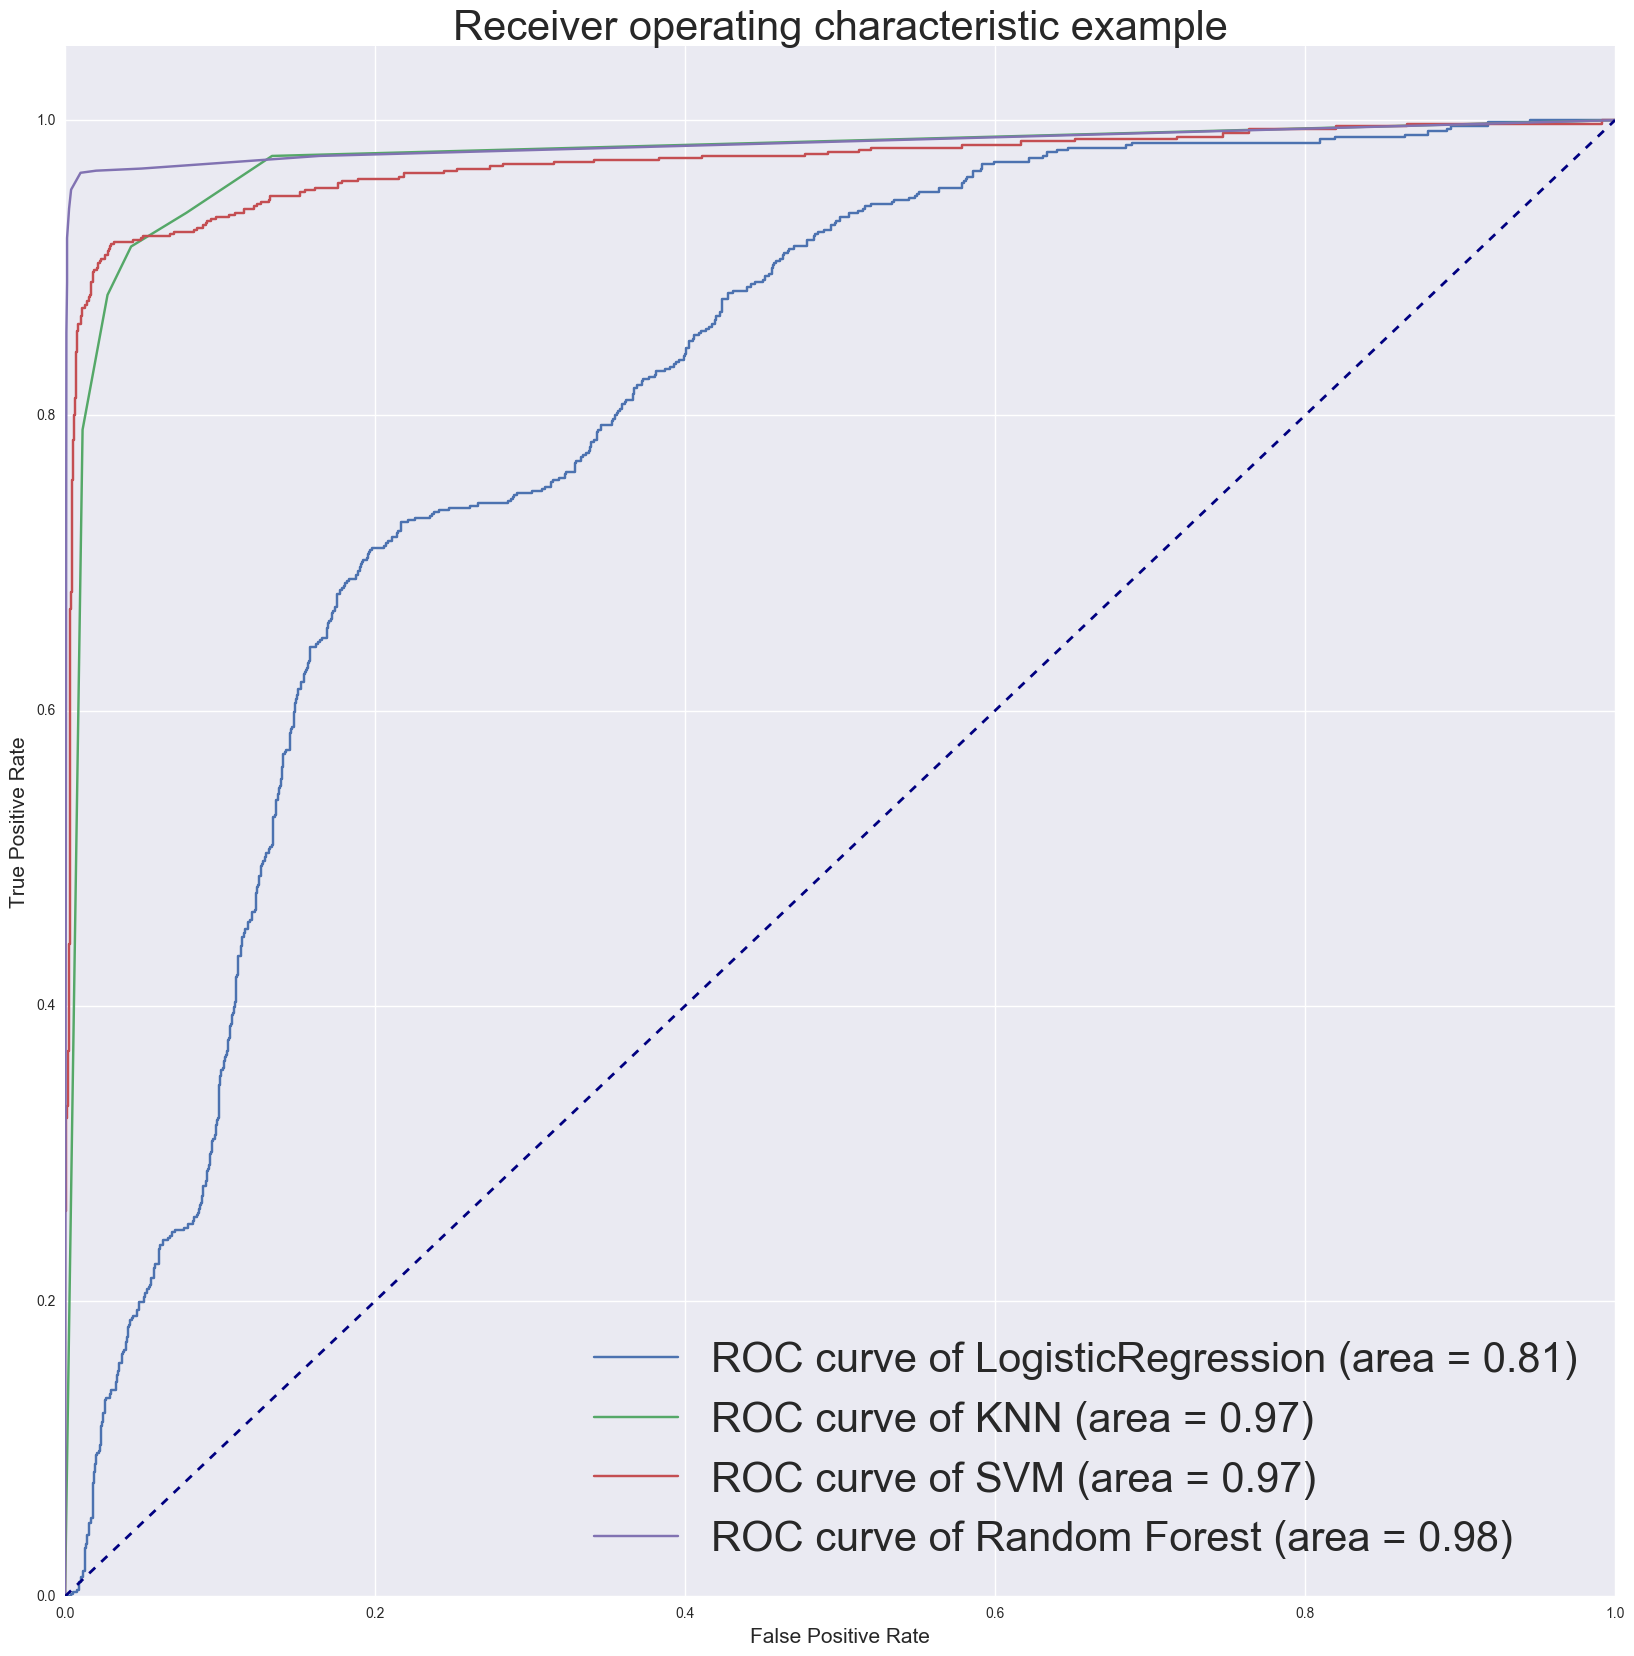

In [31]:
#plot roc curve
plt.figure(figsize=(20, 20))
lw = 2
for i in range(4):
    plt.plot(fpr[i], tpr[i], label='ROC curve of {0} (area = {1:0.2f})'
                                   ''.format(classifier_name[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 15)
plt.rc('legend', fontsize=30)    # legend fontsize
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('Receiver operating characteristic example', fontsize = 30)
plt.legend(loc="lower right")
plt.show()